# Entregable Data Preparation

In [3]:
#importamos librerías y herramientas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OrdinalEncoder

###Creamos el Data Frame y lo nombramos _df_bmw_

In [4]:
df_bmw = pd.read_csv("./data/bmw_pricing_v3.csv")

In [5]:
# ESTRUCTURA DE DATOS
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

###Revisamos si hay duplicados para eliminar

In [6]:
df_bmw[df_bmw.duplicated(keep=False)] #No hay duplicados
#Para comprobar que no hay duplicados hago un conteo inicial de mis filas, utilizo drop_duplicated y vuelvo a contar filas
# len(imdb)
# imdb.drop_duplicated(inplace=True)
# len(imdb)

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


###Iniciamos con los  cambios, previa copia

In [7]:
df_bmw2 = df_bmw.copy()

In [8]:
df_bmw2.isnull().sum()

marca                           970
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

In [9]:
#Observamos nulos inferiores al 1% en las columnas, las eliminamos
for i in df_bmw2:
  if df_bmw2[i].isnull().sum() < 7:
   df_bmw2.dropna(subset=[i],inplace=True)

###Hacemos una copia para revisar variable por variable

In [10]:
#Empezamos a revisar las variables
df_bmw3 = df_bmw2.copy()

In [11]:
df_bmw3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4817 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3852 non-null   object 
 1   modelo                       4817 non-null   object 
 2   km                           4817 non-null   float64
 3   potencia                     4817 non-null   float64
 4   fecha_registro               2408 non-null   object 
 5   tipo_gasolina                4817 non-null   object 
 6   color                        4375 non-null   object 
 7   tipo_coche                   3368 non-null   object 
 8   volante_regulable            4817 non-null   object 
 9   aire_acondicionado           4335 non-null   object 
 10  camara_trasera               4817 non-null   object 
 11  asientos_traseros_plegables  1444 non-null   object 
 12  elevalunas_electrico         4817 non-null   object 
 13  bluetooth              

###Variable **Marca**
Observamos que tiene solo dos únicos valores y como sabemos que el dataset es de BMW, los nulos lo completamos con la moda y/o la misma marca. Al tratarse de toda la columna el mismo valor, decidimos eliminarla.

In [12]:
#df_bmw3['marca'].isnull().sum()
#df_bmw3['marca'].unique()
#df_bmw3['marca'].value_counts(normalize=True)
df_bmw3['marca'].fillna(df_bmw3['marca'].mode()[0], inplace=True) #Completo los nulos con la moda

C:\Users\rafas\AppData\Local\Temp\ipykernel_15088\338064117.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bmw3['marca'].fillna(df_bmw3['marca'].mode()[0], inplace=True) #Completo los nulos con la moda


In [13]:
del(df_bmw3['marca'])

###Variable **Color**
Observamos su distribución con _normalize_ y lo reemplazamos los nulos con la moda

In [14]:
df_bmw3[df_bmw3['color'].isnull()]
#df_bmw3['color'].value_counts(normalize=True)
df_bmw3['color'].fillna(df_bmw3['color'].mode()[0], inplace=True)

C:\Users\rafas\AppData\Local\Temp\ipykernel_15088\881180119.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bmw3['color'].fillna(df_bmw3['color'].mode()[0], inplace=True)


In [15]:
df_bmw4 = df_bmw3.copy()

###Variable **tipo_coche**
Reemplazamos los nulos con _sin tipo_

In [16]:
df_bmw4['tipo_coche'].fillna('sin tipo', inplace=True)

C:\Users\rafas\AppData\Local\Temp\ipykernel_15088\3349981566.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bmw4['tipo_coche'].fillna('sin tipo', inplace=True)


###Variable **aire_acondicionado**

In [17]:
df_bmw4['aire_acondicionado'].unique() #Evaluamos luego

array([True, False, nan], dtype=object)

###Variable **asientos_traseros_plegables**

In [18]:
#Eliminamos la columna ya que tienes mas del 75% nulos
del(df_bmw4['asientos_traseros_plegables'])

###Variable **bluetooth**

In [19]:
df_bmw4['bluetooth'].unique() #Evaluamos luego

array([nan, True, False], dtype=object)

###Variable **alerta_lim_velocidad**

In [20]:
df_bmw4['alerta_lim_velocidad'].unique() #Evaluamos luego

array([nan, True, False], dtype=object)

## Hacemos una copia y cambiamos el formato de fechas.

In [26]:
df_bmw5 = df_bmw4.copy()

In [27]:
df_bmw5['fecha_registro']=pd.to_datetime(df_bmw5['fecha_registro'])
df_bmw5['fecha_venta']=pd.to_datetime(df_bmw5['fecha_venta'])

## Creamos una nueva columna "Antiguedad" en años.

In [30]:
df_bmw5["antiguedad"]= round((df_bmw5["fecha_venta"]-df_bmw5["fecha_registro"])/ np.timedelta64(1,'m'))/(1440*365)

In [31]:
df_bmw5["antiguedad"]

0       5.920548
1            NaN
2       5.841096
3            NaN
4            NaN
          ...   
4838         NaN
4839    3.169863
4840    2.920548
4841    2.419178
4842         NaN
Name: antiguedad, Length: 4817, dtype: float64

## Completamos los nulos con la moda

In [32]:
df_bmw5["antiguedad"].fillna(df_bmw5["antiguedad"].mode()[0], inplace=True)

## Observamos nuestra nueva variable mediante un histrograma y nos damos cuenta que contiene valores negativos, lo cual no es posible. 


array([[<Axes: title={'center': 'antiguedad'}>]], dtype=object)

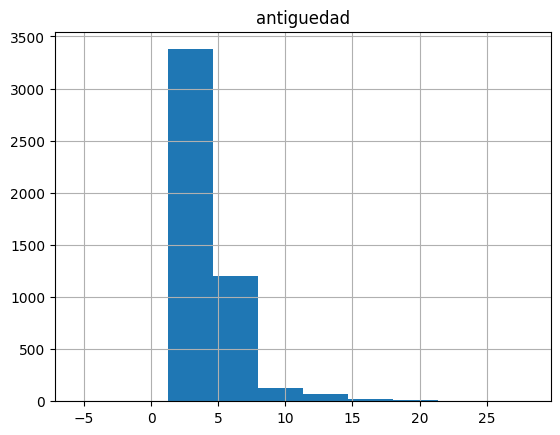

In [33]:
df_bmw5.hist('antiguedad')

In [34]:
#df_bmw5[df_bmw5['antiguedad']<0]
#Elimino valores menors a 0
df_bmw5.drop(df_bmw5[df_bmw5['antiguedad']<0].index, inplace=True)